<a href="https://colab.research.google.com/github/cactus1386/NationalCard-ImageProccessing/blob/main/detect_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install ultralytics
!pip install easyocr
from ultralytics import YOLO
import cv2
import easyocr
import numpy as np


  Using cached ultralytics-8.3.74-py3-none-any.whl.metadata (35 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.m

In [12]:

# 1. Load YOLO model and OCR reader
yolo_model = YOLO("TextDetection.pt")  # Load your trained YOLO model
ocr_reader = easyocr.Reader(['fa'])  # Initialize easyocr (specify languages if needed)



In [22]:
from google.colab.patches import cv2_imshow

In [30]:
def process_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read image at {image_path}")
        return

    results = yolo_model(img)
    for result in results:
        boxes = result.boxes
        for box in boxes:
            xyxy = box.xyxy[0]  # Get the tensor
            x1, y1, x2, y2 = map(int, xyxy.tolist()) # Convert to list and then to int

            # 2. Create Mask (Crop the region of interest)
            cropped_image = img[y1:y2, x1:x2]
            cv2_imshow(cropped_image)
            # 3. OCR on the cropped region
            ocr_result = ocr_reader.readtext(cropped_image)

            # 4. Process OCR results
            for (bbox, text, conf) in ocr_result:
                if conf > 0.5:  # Confidence threshold (adjust as needed)
                    print(f"Detected Text: {text}, Confidence: {conf}")

                    # Draw bounding box and text on original image (optional)
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2_imshow(img)




0: 448x640 1 Birth, 1 Expire, 1 FatherName, 1 LastName, 1 Name, 1 National, 13.4ms
Speed: 2.9ms preprocess, 13.4ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Detected Text: ٢٣٤٥٦٧٨٩, Confidence: 0.9538048051068095


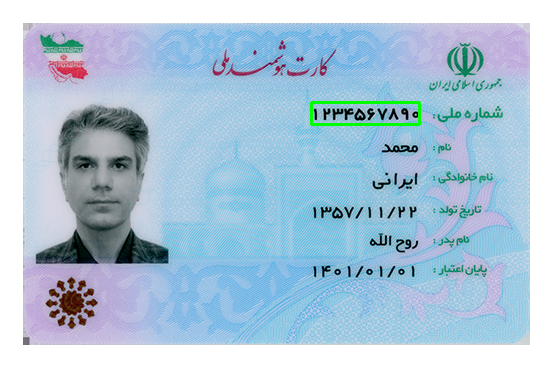

Detected Text: ١٤٥١/٥١/٥, Confidence: 0.8880614590394869


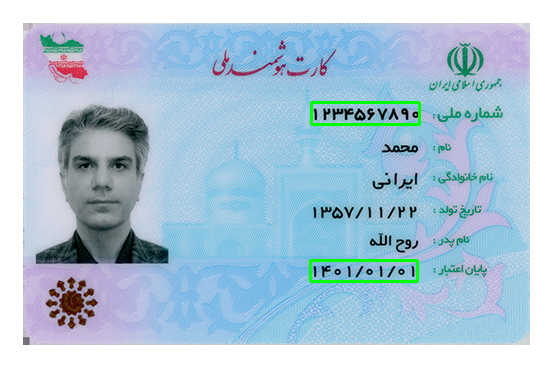

Detected Text: 9ح الله, Confidence: 0.9469467540149713


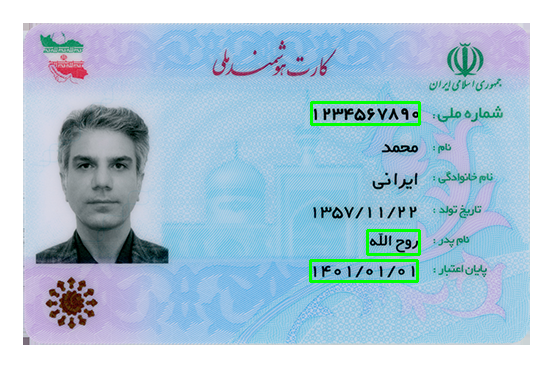

Detected Text: ١/٢ ١٣٥٧/١, Confidence: 0.6853305403065384


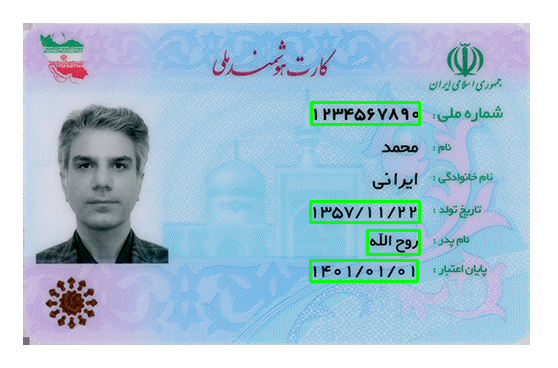

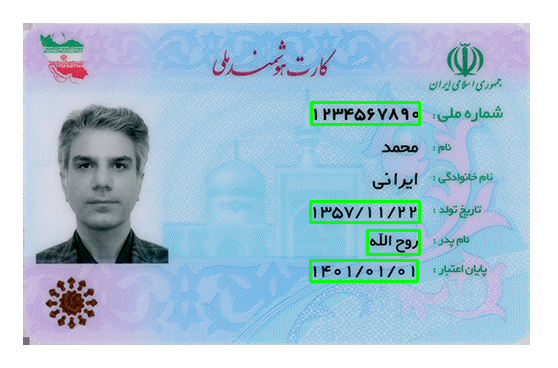

Detected Text: محمد, Confidence: 0.7208579182624817


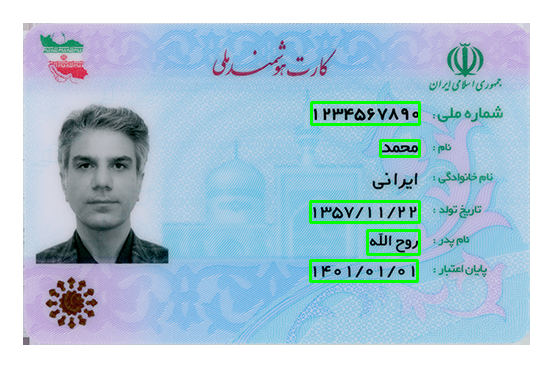

In [31]:

# Example usage:
image_path = "/content/images/13.jpg"  # Replace with your image path
process_image(image_path)
